# Get Python to do the Math for You

Math can help you understand a lot of methods in data science. Solving equations by hand can be time consuming and error prone, especially if it's not your day job. Luckily, Python can handle the boring parts for you so you can focus on understanding how it works, and getting things done.

## Contents

[Import](#Import)<br>
[Plotting a function/equation](#Plotting-a-function/equation)

## Import

In [43]:
import sympy as sym
from sympy import symbols, plot, lambdify, sympify
import numpy as np

# plotting
import seaborn as sns

In [4]:
# set plot style for dark mode (not necessary to understand the notebook)
sns.set_theme(rc={
                  'font.size': 10,
                  'xtick.labelsize': 8,
                  'ytick.labelsize': 8,
                  'axes.labelsize': 8,
                  'axes.spines.right': False,
                  'axes.spines.top': False,
                  'axes.facecolor': '#1E1E1E',  # Very dark gray
                  'figure.facecolor': '#1E1E1E',  # Very dark gray
                  'axes.grid': False,
                  'xtick.color': 'w',  # White x-axis tick labels
                  'ytick.color': 'w',  # White y-axis tick labels
                  'text.color': 'w',  # White text
                  'axes.labelcolor': 'w',  # White axis labels
                  'figure.titlesize': 'large',  # Set the size of the figure title
                  'figure.titleweight': 'bold',  # Set the weight of the figure title
              })

# store a colour palette
col_pal = sns.color_palette("muted")
sns.set_palette(col_pal)

## Plotting a function/equation

If you can plot a function, for many of us (me included) it's the best way to wrap your head around it.

Let's plot the function $3x^2 + 2x + 1$ over the interval $[-5, 5]$

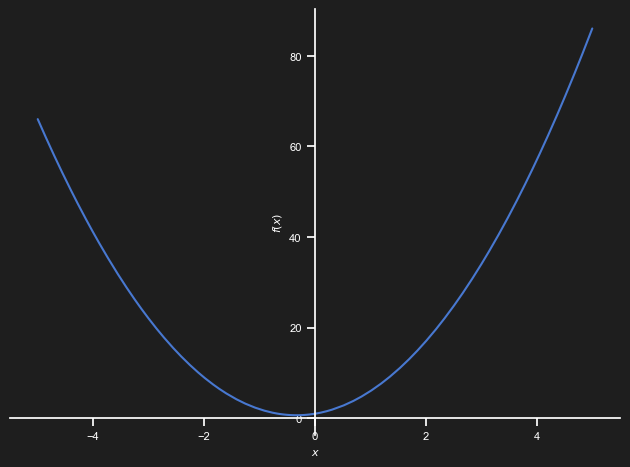

In [22]:
x = symbols('x')
f = 3*x**2 + 2*x + 1

# Plot the function f over the range x = [-5, 5].
plot(f, (x, -5, 5));

In [25]:
# we still have access to the equation f, until we overwrite it
f

3*x**2 + 2*x + 1

## Partial Functions (Fixing Variables)

This is something you might be able to work out with standard python. For example:

In [8]:
def quad(a, b, c, x):
    """
    Returns the value of the quadratic equation ax^2 + bx + c for a given value of x.

    Parameters:
    a (float): The coefficient of x^2.
    b (float): The coefficient of x.
    c (float): The constant term.
    x (float): The value of x.

    Returns:
    float: The value of the quadratic equation ax^2 + bx + c for the given value of x.
    """
    return a*x**2 + b*x + c
    
quad(3, 2, 1, 2)

17

You simplify only modify the value of x, or fix the values of a, b, and and c within the function. However, there are some handy tools to add to the mix...

We can create a similar function to the one above using lambdify.

In [42]:
a, b, c, x = symbols('a b c x')
expr = a*x**2 + b*x + c

f_lamb = lambdify((x,), expr.subs({a: 3, b: 2, c: 1}))
f_lamb(2)

17

If we want a sympy equation as an output though, we can do the follwing:

In [45]:
a, b, c, x = symbols('a b c x')
expr = a*x**2 + b*x + c

f_eq = expr.subs({a: 3, b: 2, c: 1})

f_eq.subs({x: 2})

17

This is an example of a partial function. We fix a, b, and c, and then it's easier to explore what happens when we vary x. It works the same way as partial from  functools. I give an example of that below.

In [13]:
from functools import partial

partial_quad = partial(quad, 3, 2, 1)
partial_quad(2)

17

If we plot this partial function we get exactly the same result as above. Remember this is using this definition: <br> 
```f_eq = expr.subs({a: 3, b: 2, c: 1})``` <br>
The plot function requires a sympy expression, so we can't use the partial function from functools or the lambdify function directly.

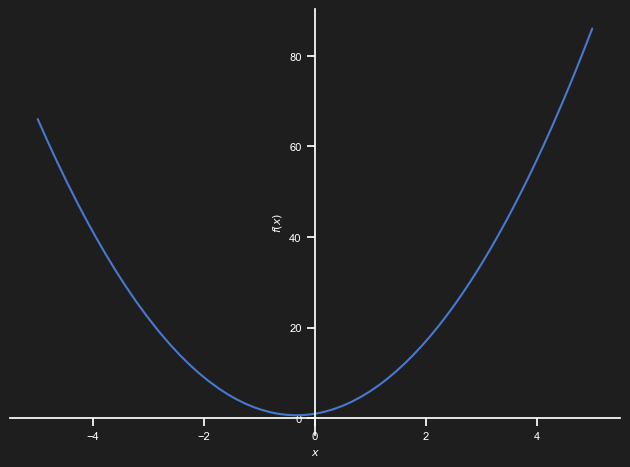

In [36]:
plot(f, (x, -5, 5));

d:\work\NotebookSchool\learn-with-notebooks\envlearn\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\work\NotebookSchool\learn-with-notebooks\envlearn\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\work\NotebookSchool\learn-with-notebooks\envlearn\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\work\NotebookSchool\learn-with-notebooks\envlearn\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

<Axes: >

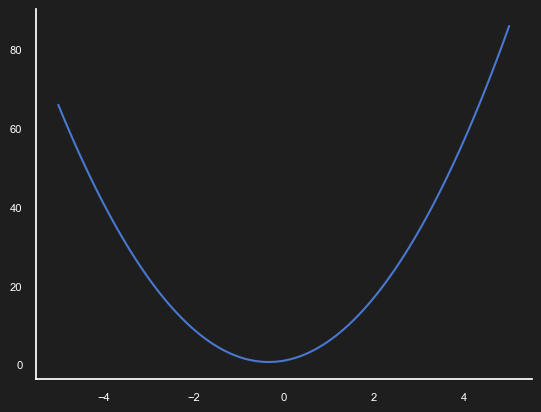

In [53]:
x_lin = np.linspace(-5, 5, 100)
f_lamb(x_lin)
sns.lineplot(x=x_lin, y=f_lamb(x_lin))